# upload and download from s3 bucket

In [1]:
import boto3

In [2]:
import pandas as pd

In [3]:
s3 = boto3.client('s3')

In [4]:
s3 = boto3.resource(
    service_name='s3',
    region_name='us-east-1',
    aws_access_key_id='#####',
    aws_secret_access_key='#####'
)

In [5]:
# Print out bucket names
for bucket in s3.buckets.all():
    print(bucket.name)

boto3v1


In [6]:
import os
os.environ["AWS_DEFAULT_REGION"] = 'us-east-1'
os.environ["AWS_ACCESS_KEY_ID"] = '#####'
os.environ["AWS_SECRET_ACCESS_KEY"] = '#####'

In [7]:
# Make dataframes
boto3_upload = pd.DataFrame({'x': [1, 2, 3], 'y': ['a', 'b', 'c']})
#bar = pd.DataFrame({'x': [10, 20, 30], 'y': ['aa', 'bb', 'cc']})

# Save to csv
boto3_upload.to_csv('boto3_upload.csv')
#bar.to_csv('bar.csv')

In [8]:
# Upload files to S3 bucket
s3.Bucket('boto3v1').upload_file(Filename='boto3_upload.csv', Key='boto3_upload.csv')

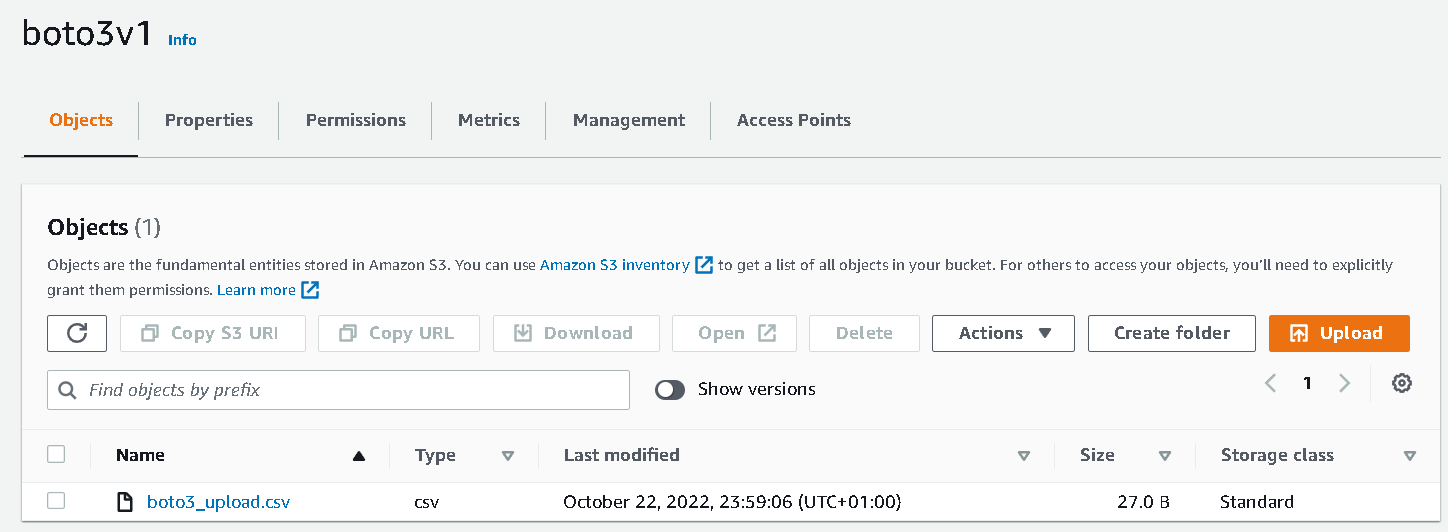

In [9]:
for obj in s3.Bucket('boto3v1').objects.all():
    print(obj)

s3.ObjectSummary(bucket_name='boto3v1', key='boto3_upload.csv')


In [10]:
# Load csv file directly into python
obj = s3.Bucket('boto3v1').Object('boto3_upload.csv').get()
foo = pd.read_csv(obj['Body'], index_col=0)

In [11]:
foo

,x,y
0,1,a
1,2,b
2,3,c


In [12]:
# Download file and read from disc
s3.Bucket('boto3v1').download_file(Key='boto3_upload.csv', Filename='foo2.csv')
pd.read_csv('foo2.csv', index_col=0)

,x,y
0,1,a
1,2,b
2,3,c


# create a new s3 bucket

In [13]:
s3.create_bucket(Bucket='boto3v2')

s3.Bucket(name='boto3v2')

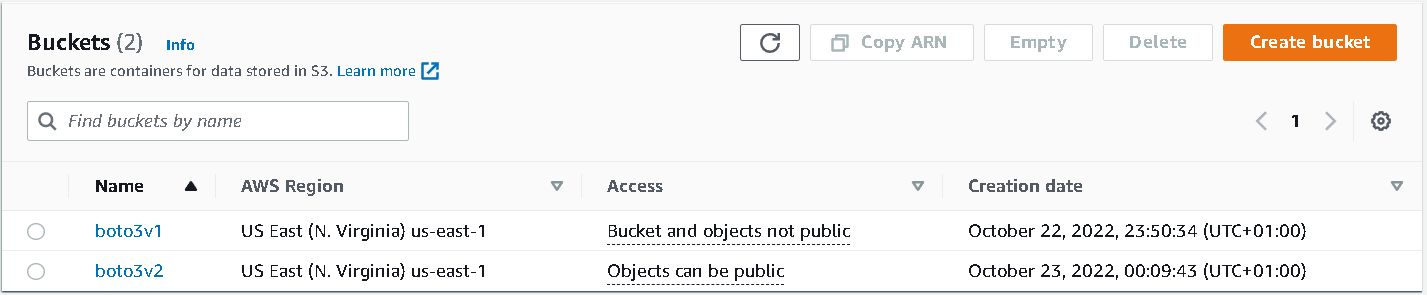

# delete a file in s3 bucket and delete s3 bucket

In [14]:
# add a new csv to boto3v2
s3.Bucket('boto3v2').upload_file(Filename='boto3_upload.csv', Key='boto3_upload.csv')

In [15]:
# add a new csv to boto3v2
boto3_upload2 = pd.DataFrame({'x': [10, 20, 30], 'y': ['aa', 'bb', 'cc']})
# Save to csv
boto3_upload2.to_csv('boto3_upload2.csv')
s3.Bucket('boto3v2').upload_file(Filename='boto3_upload2.csv', Key='boto3_upload2.csv')

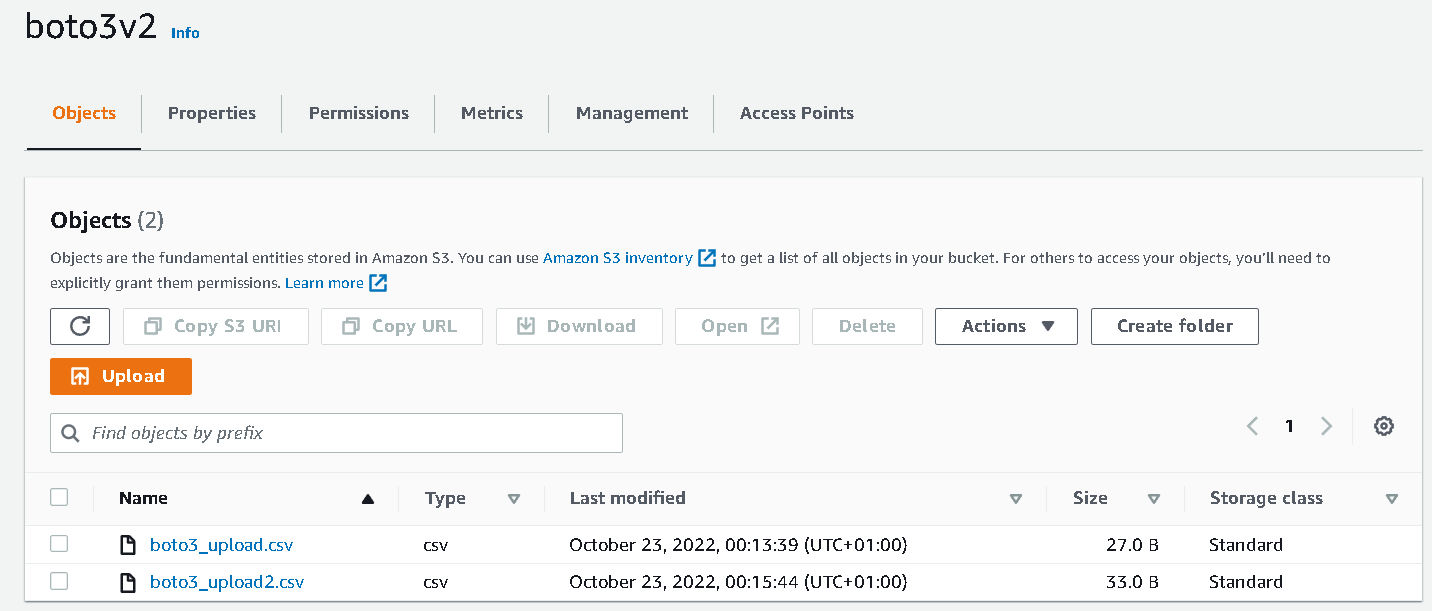

In [16]:
# delete boto3_upload2.csv
s3.Object('boto3v2', 'boto3_upload2.csv').delete()

{'ResponseMetadata': {'RequestId': 'EX6SH1205CEW436C',
  'HostId': '3fXT/u4qfp7JqRcoKWxIL+YwBCWW30pG8FJvVnygd6SywV9wuuoGIKe1fORwgWxPmJXsMmCzNJw=',
  'HTTPStatusCode': 204,
  'HTTPHeaders': {'x-amz-id-2': '3fXT/u4qfp7JqRcoKWxIL+YwBCWW30pG8FJvVnygd6SywV9wuuoGIKe1fORwgWxPmJXsMmCzNJw=',
   'x-amz-request-id': 'EX6SH1205CEW436C',
   'date': 'Sat, 22 Oct 2022 23:17:00 GMT',
   'server': 'AmazonS3'},
  'RetryAttempts': 0}}

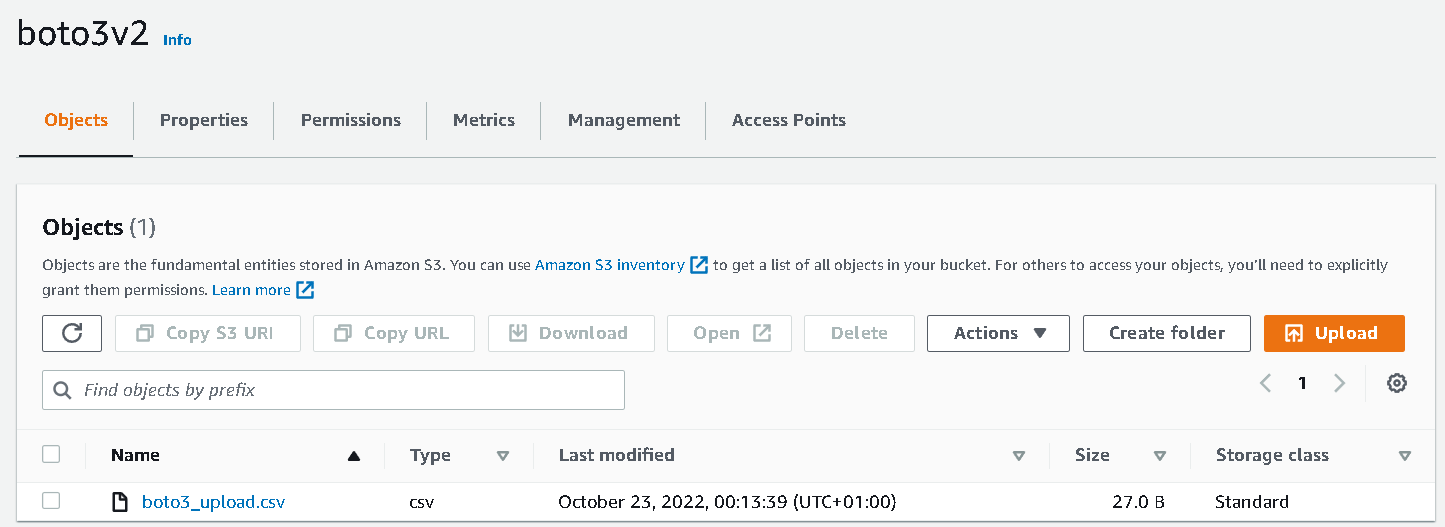

In [18]:
# delete boto3_upload.csv
s3.Object('boto3v2', 'boto3_upload.csv').delete()

{'ResponseMetadata': {'RequestId': 'SG4K7YSGBN4PWXXE',
  'HostId': '5JqQOkEyPbJTvfT1LiIhMV4zLWbRhbXuszHhig6tT6S/M9BpyVuQQmUjlRIOsAFYPtkIod4pdsw=',
  'HTTPStatusCode': 204,
  'HTTPHeaders': {'x-amz-id-2': '5JqQOkEyPbJTvfT1LiIhMV4zLWbRhbXuszHhig6tT6S/M9BpyVuQQmUjlRIOsAFYPtkIod4pdsw=',
   'x-amz-request-id': 'SG4K7YSGBN4PWXXE',
   'date': 'Sat, 22 Oct 2022 23:19:17 GMT',
   'server': 'AmazonS3'},
  'RetryAttempts': 0}}

In [19]:
# delete s3 bucket boto3v2
s3.Bucket('boto3v2').delete()

{'ResponseMetadata': {'RequestId': 'G1XY19BGMSQJWM59',
  'HostId': 'MqkfvH3NB0UL9zYq5zg+NAr83dfDl98wEjnq/uZRkFYRzFc450qNW5aBBHZibklXECooBr6eYFE=',
  'HTTPStatusCode': 204,
  'HTTPHeaders': {'x-amz-id-2': 'MqkfvH3NB0UL9zYq5zg+NAr83dfDl98wEjnq/uZRkFYRzFc450qNW5aBBHZibklXECooBr6eYFE=',
   'x-amz-request-id': 'G1XY19BGMSQJWM59',
   'date': 'Sat, 22 Oct 2022 23:19:20 GMT',
   'server': 'AmazonS3'},
  'RetryAttempts': 0}}

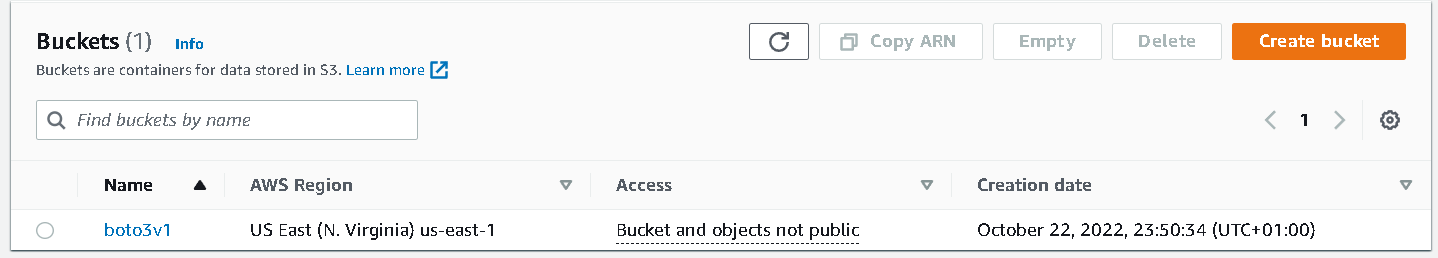